In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv',nrows=6729)

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [4]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=4495)

In [5]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [6]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   int64  
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 210.4+ KB


In [8]:
gdp_df[-10:]

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [9]:
internet_df[-10:]

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [10]:
internet_df = internet_df.drop('Value Footnotes',1)

In [11]:
gdp_df = gdp_df.drop('Value Footnotes',1)

In [12]:
gdp_df = gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [13]:
internet_df = internet_df.rename(columns={'Country or Area':'Country','Value':'Internet_Users_Pct'})

In [14]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='outer',on=['Country','Year'])
gdp_and_internet_use = gdp_and_internet_use.reset_index(drop=True)

In [15]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


In [16]:
gdp_and_internet_use[-5:]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


In [17]:
gdp_and_internet_use = gdp_and_internet_use[(gdp_and_internet_use['Year'].isin([2004,2009,2014]))]
gdp_and_internet_use = gdp_and_internet_use.reset_index(drop=True)

In [18]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
1,Afghanistan,2009,1502.354073,3.550000
2,Afghanistan,2004,1025.208245,0.105809
3,Albania,2014,10700.993216,60.100000
4,Albania,2009,9525.377979,41.200000


In [19]:
gdp_internet_2004 = gdp_and_internet_use[gdp_and_internet_use.Year==2004]
gdp_internet_2009 = gdp_and_internet_use[gdp_and_internet_use.Year==2009]
gdp_internet_2014 = gdp_and_internet_use[gdp_and_internet_use.Year==2014]

In [20]:
print(gdp_internet_2004.head())
print(gdp_internet_2009.head())
print(gdp_internet_2014.head())

                Country  Year  GDP_Per_Capita  Internet_Users_Pct
2           Afghanistan  2004     1025.208245            0.105809
5               Albania  2004     7001.054082            2.420388
8               Algeria  2004    11845.170512            4.634475
11               Angola  2004     4604.657044            0.464815
14  Antigua and Barbuda  2004    21161.123532           24.266544
                Country  Year  GDP_Per_Capita  Internet_Users_Pct
1           Afghanistan  2009     1502.354073                3.55
4               Albania  2009     9525.377979               41.20
7               Algeria  2009    12697.690780               11.23
10               Angola  2009     6292.534856                6.00
13  Antigua and Barbuda  2009    22568.626530               42.00
                Country  Year  GDP_Per_Capita  Internet_Users_Pct
0           Afghanistan  2014     1795.735834                6.39
3               Albania  2014    10700.993216               60.10
6         

In [21]:
print(gdp_internet_2014[gdp_internet_2014['Internet_Users_Pct'] == gdp_internet_2014['Internet_Users_Pct'].max()])

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
271  Iceland  2014    42774.888849               98.16


In [22]:
print(gdp_internet_2014[gdp_internet_2014['Internet_Users_Pct'] == gdp_internet_2014['Internet_Users_Pct'].min()])

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
744  Dem. People's Rep. of Korea  2014             NaN                 0.0


In [23]:
print(gdp_internet_2004[gdp_internet_2004['Internet_Users_Pct'] == gdp_internet_2004['Internet_Users_Pct'].max()])
print(gdp_internet_2004[gdp_internet_2004['Internet_Users_Pct'] == gdp_internet_2004['Internet_Users_Pct'].min()])

    Country  Year  GDP_Per_Capita  Internet_Users_Pct
627  Sweden  2004    40177.850408               83.89
                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
746  Dem. People's Rep. of Korea  2004             NaN                 0.0


In [24]:
print(gdp_internet_2009[gdp_internet_2009['Internet_Users_Pct'] == gdp_internet_2009['Internet_Users_Pct'].max()])
print(gdp_internet_2009[gdp_internet_2009['Internet_Users_Pct'] == gdp_internet_2009['Internet_Users_Pct'].min()])

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
272  Iceland  2009    41505.084834                93.0
                         Country  Year  GDP_Per_Capita  Internet_Users_Pct
745  Dem. People's Rep. of Korea  2009             NaN                 0.0


In [25]:
print(gdp_internet_2014[gdp_internet_2014['GDP_Per_Capita'] == gdp_internet_2014['GDP_Per_Capita'].max()])

              Country  Year  GDP_Per_Capita  Internet_Users_Pct
385  Macao SAR, China  2014   130439.106674                 NaN


In [26]:
print(gdp_internet_2014[gdp_internet_2014['GDP_Per_Capita'] == gdp_internet_2014['GDP_Per_Capita'].min()])

                      Country  Year  GDP_Per_Capita  Internet_Users_Pct
107  Central African Republic  2014      672.681648                 NaN


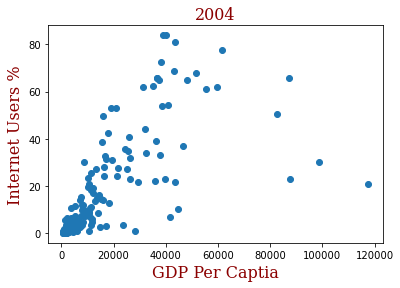

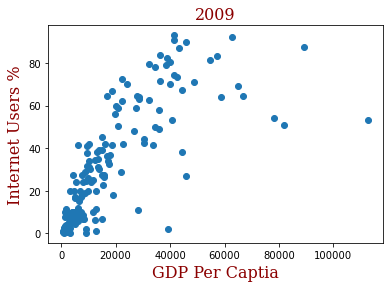

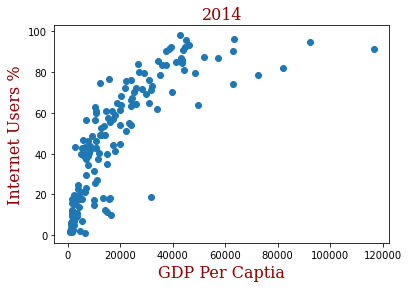

In [27]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.scatter(gdp_internet_2004['GDP_Per_Capita'],gdp_internet_2004['Internet_Users_Pct'])
plt.title('2004', fontdict = font)
plt.xlabel('GDP Per Captia', fontdict = font)
plt.ylabel('Internet Users %',fontdict = font)
plt.show()
plt.scatter(gdp_internet_2009['GDP_Per_Capita'],gdp_internet_2009['Internet_Users_Pct'])
plt.title('2009',fontdict = font)
plt.xlabel('GDP Per Captia', fontdict = font)
plt.ylabel('Internet Users %',fontdict = font)
plt.show()
plt.scatter(gdp_internet_2014['GDP_Per_Capita'],gdp_internet_2014['Internet_Users_Pct'])
plt.title('2014',fontdict = font)
plt.xlabel('GDP Per Captia', fontdict = font)
plt.ylabel('Internet Users %',fontdict = font)
plt.show()

The relationship between internet usage and GDP become stronger between '04 and '14

C:\Users\aaron\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\aaron\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


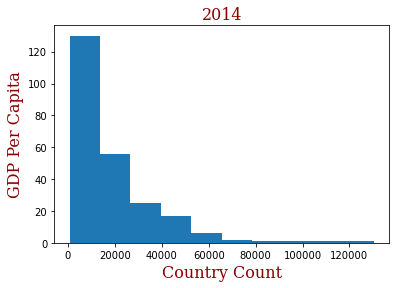

In [28]:
plt.hist(gdp_internet_2014['GDP_Per_Capita'])
plt.title('2014',fontdict = font)
plt.xlabel('Country Count', fontdict = font)
plt.ylabel('GDP Per Capita',fontdict = font)
plt.show()

2014 GDP Per Captia distribution is unimodal, with the only peak being in the lowest GDP bucket

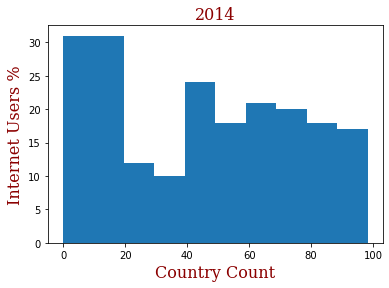

In [29]:
plt.hist(gdp_internet_2014['Internet_Users_Pct'])
plt.title('2014',fontdict = font)
plt.xlabel('Country Count', fontdict = font)
plt.ylabel('Internet Users %',fontdict = font)
plt.show()

2014 Internet Usage Pct is not unimodal because there is a peak in both the 0-20% buckets and at 40-50% bucket

In [30]:
print(gdp_internet_2014.nlargest(5,'Internet_Users_Pct'))

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
271  Iceland  2014    42774.888849               98.16
725  Bermuda  2014             NaN               96.80
480   Norway  2014    63328.259526               96.30
149  Denmark  2014    45057.083449               95.99
719  Andorra  2014             NaN               95.90


In [49]:
largestUserPct = gdp_internet_2014.nlargest(5,'Internet_Users_Pct')
top_5_internet = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(largestUserPct['Country'])]
top_5_internet = top_5_internet.sort_values(['Country','Year'])
top_5_internet = top_5_internet.reset_index(drop=True)
print(top_5_internet)

    Country  Year  GDP_Per_Capita  Internet_Users_Pct
0   Andorra  2004             NaN           26.837954
1   Andorra  2009             NaN           78.530000
2   Andorra  2014             NaN           95.900000
3   Bermuda  2004    55452.638880           60.990867
4   Bermuda  2009    57151.919132           83.250000
5   Bermuda  2014             NaN           96.800000
6   Denmark  2004    43670.446201           80.930000
7   Denmark  2009    43382.615688           86.840000
8   Denmark  2014    45057.083449           95.990000
9   Iceland  2004    38893.378798           83.880000
10  Iceland  2009    41505.084834           93.000000
11  Iceland  2014    42774.888849           98.160000
12   Norway  2004    61612.275634           77.690000
13   Norway  2009    62617.153609           92.080000
14   Norway  2014    63328.259526           96.300000


<Figure size 432x288 with 0 Axes>

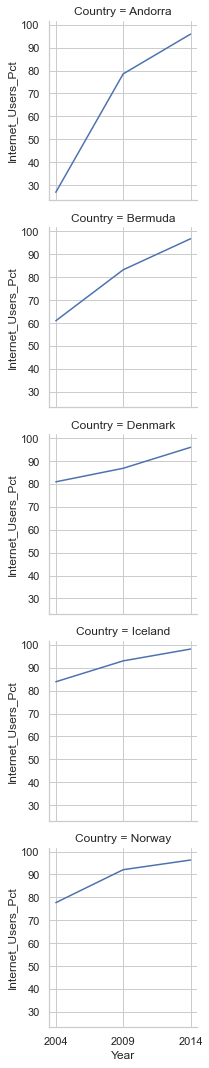

In [50]:
plt.clf()
import seaborn as sns
sns.set_style('whitegrid')
snsfgtop = sns.FacetGrid(top_5_internet, row='Country')
snsfgtop = snsfgtop.map(plt.plot, 'Year','Internet_Users_Pct')
snsfgtop = snsfgtop.set(xticks=[2004,2009,2014])
plt.show(snsfgtop)

Andorra had the greatest improvement of the top 5 countries from '14. 

<Figure size 432x288 with 0 Axes>

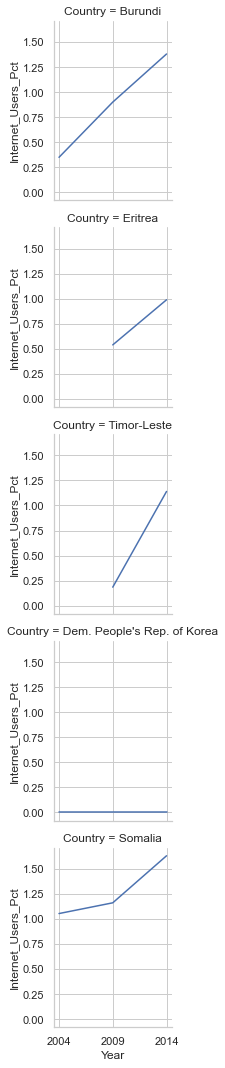

In [51]:
plt.clf()
smallestUserPct = gdp_internet_2014.nsmallest(5,'Internet_Users_Pct')
bottom_5_internet = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(smallestUserPct['Country'])]
#print(bottom_5_internet)
sns.set_style('whitegrid')
snsfgbot = sns.FacetGrid(bottom_5_internet, row='Country')
snsfgbot = snsfgbot.map(plt.plot, 'Year','Internet_Users_Pct')
snsfgbot = snsfgbot.set(xticks=[2004,2009,2014])
plt.show(snsfgbot)

North Korea has consistently had 0% internet usage

<Figure size 432x288 with 0 Axes>

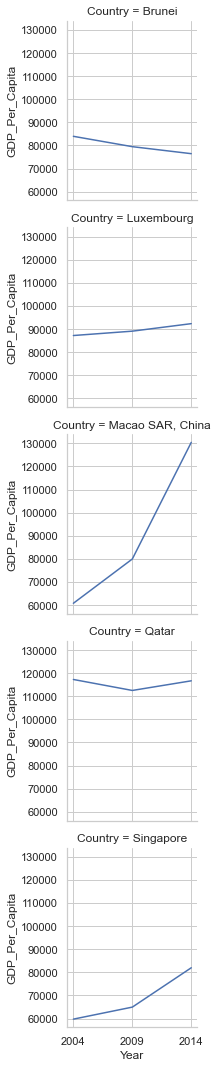

In [55]:
plt.clf()
largestGDP = gdp_internet_2014.nlargest(5,'GDP_Per_Capita')
top_5_GDP = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(largestGDP['Country'])]
top_5_GDP = top_5_GDP.sort_values(['Country','Year'])
top_5_GDP = top_5_GDP.reset_index(drop=True)
sns.set_style('whitegrid')
snsfgtgdp = sns.FacetGrid(top_5_GDP, row='Country')
snsfgtgdp = snsfgtgdp.map(plt.plot, 'Year','GDP_Per_Capita')
snsfgtgdp = snsfgtgdp.set(xticks=[2004,2009,2014])
plt.show(snsfgtgdp)

<Figure size 432x288 with 0 Axes>

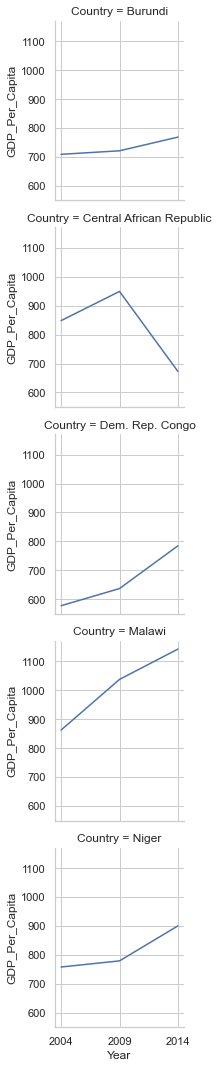

In [56]:
plt.clf()
smallestGDP = gdp_internet_2014.nsmallest(5,'GDP_Per_Capita')
bot_5_GDP = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(smallestGDP['Country'])]
bot_5_GDP = bot_5_GDP.sort_values(['Country','Year'])
bot_5_GDP = bot_5_GDP.reset_index(drop=True)
sns.set_style('whitegrid')
snsfgbgdp = sns.FacetGrid(bot_5_GDP, row='Country')
snsfgbgdp = snsfgbgdp.map(plt.plot, 'Year','GDP_Per_Capita')
snsfgbgdp = snsfgbgdp.set(xticks=[2004,2009,2014])
plt.show(snsfgbgdp)

The biggest standout from this data is Macao SAR, China more than doubling its GDP per capita in a decade.  China's easing on travel restrictions and the liberalisation of Macau's gaming industry seemed to have driven a lot of that growth.